TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'min_impurity_split'

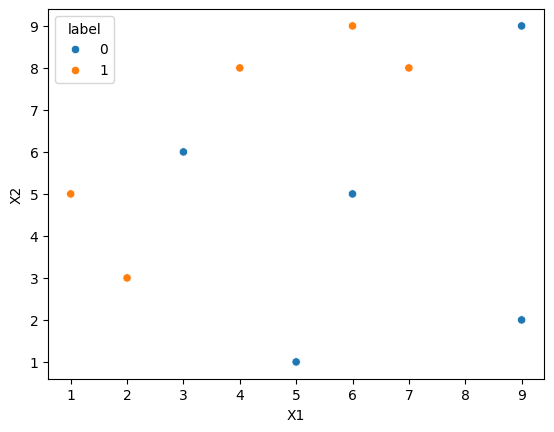

In [2]:


import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
     

df = pd.DataFrame()
     

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
     


import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])


df['weights'] = 1/df.shape[0]
     

df
     

from sklearn.tree import DecisionTreeClassifier
     

dt1 = DecisionTreeClassifier(max_depth=1)
     

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
     

# Step 2 - Train 1st model
dt1.fit(X,y)
     
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

from sklearn.tree import plot_tree
plot_tree(dt1)
     

plot_decision_regions(X, y, clf=dt1, legend=2)



df['y_pred'] = dt1.predict(X)
     


def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))
     

# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1
     


# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

df['updated_weights'] = df.apply(update_row_weights,axis=1)
     



df['updated_weights'].sum()
     

df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
     

df
     

df['nomalized_weights'].sum()
     


df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
     

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
     

df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]
     

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices
     

index_values = create_new_dataset(df)


     


second_df = df.iloc[index_values,[0,1,2,3]]
     



dt2 = DecisionTreeClassifier(max_depth=1)
     

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     

dt2.fit(X,y)
     
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

plot_tree(dt2)
     



plot_decision_regions(X, y, clf=dt2, legend=2)
     



second_df['y_pred'] = dt2.predict(X)
     


alpha2 = calculate_model_weight(0.1)
     


# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
     


second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
     



second_df['nomalized_weights'].sum()
     


second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]
     

index_values = create_new_dataset(second_df)
     

third_df = second_df.iloc[index_values,[0,1,2,3]]
     




dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)
     
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

plot_decision_regions(X, y, clf=dt3, legend=2)
     


third_df['y_pred'] = dt3.predict(X)
     

third_df
     

alpha3 = calculate_model_weight(0.7)
alpha3
     

print(alpha1,alpha2,alpha3)
     


query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
     


dt2.predict(query)
     


dt3.predict(query)
     


alpha1*1 + alpha2*(1) + alpha3*(1)
     


np.sign(1.09)
     


query = np.array([9,9]).reshape(1,2)
dt1.predict(query)
     


dt2.predict(query)
     


dt3.predict(query)
     


alpha1*(1) + alpha2*(-1) + alpha3*(-1)
     


np.sign(-0.25)
     



     